In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df_train = pd.read_csv('./datasets/train_cleaned_eng.csv')
df_test = pd.read_csv('./datasets/test_cleaned_eng.csv')

In [4]:
def feat_sel(df):
    
    # Feature Selection for tuning
    X_features = ['Id', 
#                 'lot_area', 
                'street', 
#                 'land_cont', 
                'neighborhood', 
                'cond_1',
#                 'cond_2', 
                'bldg_type', 
                'style', 
                'overall_qual',
                'overall_cond',
                'yr_built', 
                'yr_remodeled', 
                'roof_style', 
#                 'roof_mater', 
                'exter_1',
#                 'exter_qual',
                'exter_cond', 
                'foundation', 
                'bsmt_qual',   #
                'bsmt_cond', 
                'bsmt_expo',
                'bsmt_fin_1',
#                 'bsmt_fin_1_sf', 
#                 'bsmt_fin_2', 
#                 'bsmt_fin_2_sf', 
#                 'bsmt_sf', 
#                 'heat',
                'cent_air', 
#                 'gr_liv_area', 
                'full_bath', 
                'half_bath', 
#                 'bedrooms_gr', 
#                 'kitchen', 
                'kitch_qual', 
                'tot_rooms_gr', 
                'fireplaces', 
                'garage_type',
                'garage_car_size', 
                'garage_cond', 
                'paved_drive', 
#                 'misc_val',
#                 'year_sold',
#                 'sale_price', 
#                 'has_pool', 
#                 'full_bath_shift',
#                 'half_bath_shift', 
#                 'bedrooms_gr_shift', 
#                 'fireplaces_shift',
#                 'garage_car_size_shift', 
#                 'lot_area_scaled_mm',
#                 'bsmt_fin_1_sf_scaled_mm', 
#                 'bsmt_fin_2_sf_scaled_mm',
#                 'bsmt_sf_scaled_mm', 
#                 'gr_liv_area_scaled_mm',
#                 'tot_rooms_gr_gr_liv_area', 
#                 'tot_rooms_gr_bedroom_gr',
#                 'full_bath_gr_liv_area', 
                'gar_car_size_overall_qual',
#                 'yr_built_overall_qual', 
                'full_bath_gr_liv_area_log',
#                 'tot_rooms_gr_bedroom_gr_log', 
#                 'lot_area_scaled_mm_log',
#                 'gr_liv_area_scaled_mm_log', 
                'bsmt_fin_1_sf_scaled_mm_log',
                'bsmt_fin_2_sf_scaled_mm_log',
                'bsmt_sf_scaled_mm_log',
                'bedrooms_gr_shift_log', 
#                 'tot_rooms_gr_log',
                'tot_rooms_gr_gr_liv_area_log',
                  'lot_area_log',
                  'gr_liv_area_log',
#                   'mas_vnr_type',
                  'bsmt_baths',
#                   'bsmt_full_bath',
#                   'bsmt_half_bath',
                  'functional',
                  'porch_sf'
               ]

    # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html
    dummies_columns = list(df[X_features].select_dtypes(include='object'))
    
    if 'sale_price' not in df.columns:
        X_test = df[X_features]
        X_test = pd.get_dummies(data=X_test, columns=dummies_columns, drop_first=True)
        return X_test
    else:
        X_train = df[X_features]
        X_train = pd.get_dummies(data=X_train, columns=dummies_columns, drop_first=True)
        return X_train

y = df_train['sale_price']

In [5]:
X_train_df = feat_sel(df_train)
X_test_df = feat_sel(df_test)

In [6]:
X_train, X_validation, y_train, y_validation = train_test_split(X_train_df, y, random_state=42)

y_train_log = y_train.map(np.log)
y_validation_log = y_validation.map(np.log)

In [7]:
lr = LinearRegression()
lr.fit(X_train, y_train_log)

LinearRegression()

In [8]:
pred = lr.predict(X_train)
residuals = y_train_log - pred

In [9]:
mse_train = metrics.mean_squared_error(y_train_log, pred)
mse_train   # Compare to mse_validation to see if model is overfit
np.sqrt(mse_train)   # Use this to compare model to model, not representative of $

0.10525809583336383

In [10]:
validation_pred = lr.predict(X_validation)

In [11]:
mse_validation = metrics.mean_squared_error(y_validation_log, validation_pred)
mse_validation   # Use this the compare model to model resulting MSE score
np.sqrt(mse_validation)   # Use this the compare model to model resulting RMSE score

0.12563907148032233

In [12]:
# R2 training score, closer to 1 the better

lr.score(X_train, y_train_log)

0.934484660121606

In [13]:
# R2 validation score, closer to 1 the better

lr.score(X_validation, y_validation_log)

0.9069839015201808

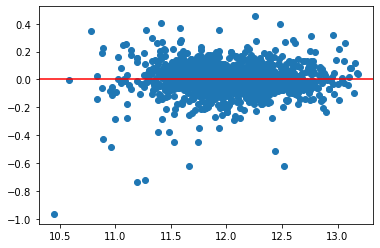

In [14]:
plt.scatter(pred, residuals)
plt.axhline(0, color='red');

In [15]:
residuals.sort_values().head()

183    -0.964736
1308   -0.732462
1563   -0.721342
348    -0.623284
508    -0.621809
Name: sale_price, dtype: float64

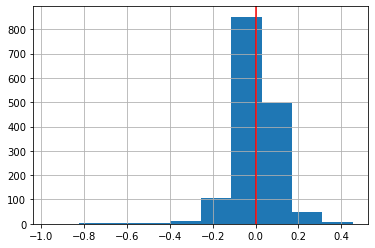

In [16]:
residuals.hist();
plt.axvline(0, color='red');

In [17]:
SalePrice = lr.predict(X_test_df)

In [18]:
SalePrice = np.exp(SalePrice)

In [19]:
df_test['SalePrice'] = SalePrice

In [20]:
jsalisbury = df_test[['Id', 'SalePrice']]

In [21]:
jsalisbury.head()

,Id,SalePrice
0,2658,112200.256109
1,2718,160091.438449
2,2414,217090.267001
3,1989,107688.922226
4,625,164634.016214


In [22]:
# jsalisbury.to_csv('./datasets/submissions/jsalisbury_61.csv', index=False)